In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
from umap.umap_ import UMAP
import hdbscan
from transformers import AutoTokenizer, AutoModel

C:\Users\johna\anaconda3\envs\twitter-analytics-env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os
import sys

notebook_dir = os.path.dirname(os.path.abspath("__file__"))
project_dir = os.path.dirname(notebook_dir)

if project_dir not in sys.path:
    sys.path.append(project_dir)


In [3]:
df = pd.read_csv(r"C:\Users\johna\anaconda3\envs\twitter-analytics-env\twitter_issues_dashboard\twitter_issues_dashboard\data\01_raw\tweets_details2023-03-15_20-43-36.csv")
df = df.loc[df['language'] == 'en']

In [4]:
# clean and pre-process text  
from data_processing.preprocess_tweets_lite import TextCleaner

cleaner = TextCleaner(stop_words_remove=False)
df['cleaned_text'] = df['text'].apply(cleaner.clean_text)
df.drop_duplicates(subset='cleaned_text', inplace=True)

In [5]:
from topic_modeling.twitter_roberta_umap_topic import TopicModelingPipeline

In [6]:
topicmodel = TopicModelingPipeline(df=df)

Some weights of the model checkpoint at cardiffnlp/twitter-xlm-roberta-base were not used when initializing XLMRobertaModel: ['lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.decoder.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaModel were not initialized from the model checkpoint at cardiffnlp/twitter-xlm-roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this mode

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
C:\Users\johna\anaconda3\envs\twitter-analytics-env\lib\site-packages\umap\umap_.py:1802: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


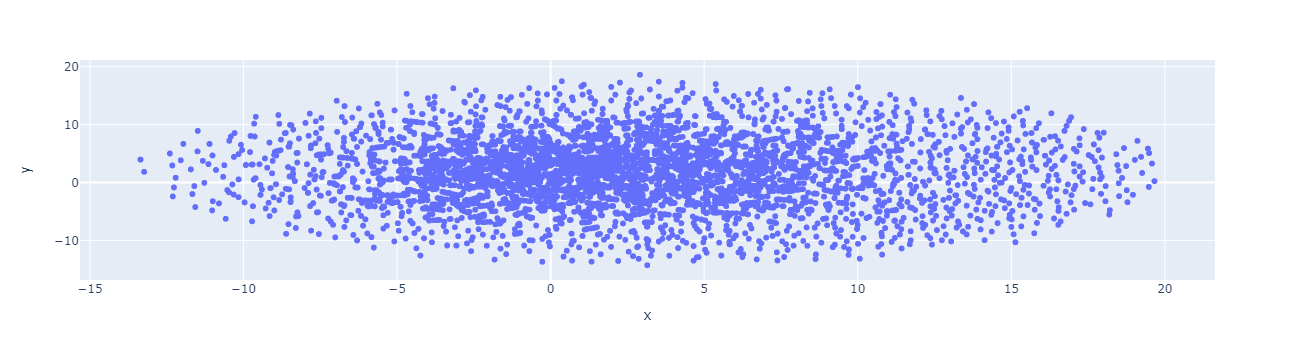

In [7]:
#umap_embeddings = topicmodel.generate_umap_embeddings(n_components=250, n_neighbors=3, metric='cosine', min_dist=1)
#umap_embeddings = topicmodel.generate_umap_embeddings(n_components=50, n_neighbors=10, metric='cosine', min_dist=0.01)
#umap_embeddings = topicmodel.generate_umap_embeddings(n_components=50, n_neighbors=5, metric='cosine', min_dist=0.75)
#umap_embeddings = topicmodel.generate_umap_embeddings(n_components=50, n_neighbors=30, metric='cosine', min_dist=0.75)
# umap_embeddings = topicmodel.generate_umap_embeddings(n_components=2, n_neighbors=15, metric='cosine', min_dist=0.1)  # is able to separate tweets investment tweets.
umap_embeddings = topicmodel.generate_umap_embeddings(n_components=2, n_neighbors=4, metric='jaccard', min_dist=0.01)  # This is promising breaks out nearest neighbours



In [8]:
clusters = topicmodel.generate_hdbscan_clusters(umap_embeddings, min_cluster_size=50, min_samples=1, cluster_selection_epsilon=0.5)

In [9]:
topicmodel.visualize_clusters(umap_embeddings, clusters)

IndexError: list index out of range

In [ ]:
df['language'].value_counts()